# Description:

* Demultiplexing libraries from MiSeq run

## Setting variables (user input)

In [1]:
import os

seqdir = '/home/backup_files/raw_reads/fullcyc2.Barnett.2018/fullCyc2_lib5/run2'
workdir = '/home/seq_data/fullCyc2/amplicon/515F-806R/final_dataset/library_QC/fullCyc2_lib5'

# metadata file location(s)
metadata = '/home/seq_data/fullCyc2/amplicon/515F-806R/final_dataset/FullCyc2_master_metadata.txt'

# Library
library = 'fullCyc2_lib5'

# Index and paired files
index_read1_file = 'index_read1.fq.gz'
index_read2_file = 'index_read2.fq.gz'
read12_screed = 'pear_merged-fullCyc2_lib5.assembled.fastq_screed'


## Init

In [2]:
import os
import json
import screed
import pandas as pd
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import scipy.stats as stats
import screed
from glob import glob

In [3]:
%cd $workdir

/home/seq_data/fullCyc2/amplicon/515F-806R/final_dataset/library_QC/fullCyc2_lib5


In [4]:
%load_ext rpy2.ipython
#%load_ext pushnote 

In [5]:
%%R
library(ggplot2)
library(dplyr)
library(tidyr)

/home/sam/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  warnings.warn(x, RRuntimeWarning)
/home/sam/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  warnings.warn(x, RRuntimeWarning)


## Loading metadata tables

In [6]:
# loading metadata sheet
df_meta = pd.read_csv(os.path.join(seqdir, metadata), delimiter="\t")
df_meta.head(n=3)

,#Sample,primer_number,exp_type,extraction_plate_ID,library_ID,pool_plate_ID,pool_plate_well,soil_ID,substrate,day,...,water_holding_capacity__g.g,percent_N,percent_C,sand__perc,silt__perc,clay__perc,DNA_conc__ng_ul,notes,fwd_barcode,rev_barcode
0,EL.A.151026,129,bulk,14012016,Chantal_Pool9,NaN,NaN,EL.A.151026,NaN,NaN,...,0.778,0.20905,2.0399,40.0,26.7,33.3,19.965,NaN,CTACTATA,CGTACTCA
1,CC.M.151027.12C-Van.D02,129,Enrichment,Enr2_160509,fullCyc2_lib14,fullCyc2_lib14_pool_2,A5,CC.M.151027.12C-Van.D02,12C-Van,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.44,NaN,CTACTATA,CGTACTCA
2,MF.M.151026.12C-Ami.D02,129,Enrichment,Enr5_170113,fullCyc2_lib15,fullCyc2_lib15_pool_2,A5,MF.M.151026.12C-Ami.D02,12C-Ami,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,27.183,NaN,CTACTATA,CGTACTCA


In [7]:
# filter only metadata from this library
df_meta = pd.DataFrame(df_meta[df_meta.library_ID==library])
df_meta

,#Sample,primer_number,exp_type,extraction_plate_ID,library_ID,pool_plate_ID,pool_plate_well,soil_ID,substrate,day,...,water_holding_capacity__g.g,percent_N,percent_C,sand__perc,silt__perc,clay__perc,DNA_conc__ng_ul,notes,fwd_barcode,rev_barcode
7,MR.M.12C-Con.D14.R1_Frac7,129,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,A5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.234,NaN,CTACTATA,CGTACTCA
20,MR.M.12C-Con.D14.R1_Frac8,130,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,B5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.293,NaN,CGTTACTA,CGTACTCA
33,MR.M.12C-Con.D14.R1_Frac9,131,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,C5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.314,NaN,AGAGTCAC,CGTACTCA
46,MR.M.12C-Con.D14.R1_Frac10,132,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,D5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.369,NaN,TACGAGAC,CGTACTCA
59,MR.M.12C-Con.D14.R1_Frac11,133,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,E5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.37,NaN,ACGTCTCG,CGTACTCA
72,MR.M.12C-Con.D14.R1_Frac12,134,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,F5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.38,NaN,TCGACGAG,CGTACTCA
85,MR.M.12C-Con.D14.R1_Frac13,135,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,G5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.729,NaN,GATCGTGT,CGTACTCA
99,MR.M.12C-Con.D14.R1_Frac14,136,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,H5,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.246,NaN,GTCAGATA,CGTACTCA
113,MR.M.12C-Con.D14.R1_Frac15,137,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,A6,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.968,NaN,CTACTATA,CTACGCAG
127,MR.M.12C-Con.D14.R1_Frac16,138,SIP,NaN,fullCyc2_lib5,fullCyc2_lib5_Pool_2,B6,MR.M.12C-Con.D14.R1,12C-Con,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,44.112,NaN,CGTTACTA,CTACGCAG


# Uncompress index files and create screed db

In [8]:
def uncomp(fileName, directory):
    output = fileName.replace(".gz", "")
    fileName = os.path.join(directory, fileName)
    !cd $workdir; \
        pigz -k -d -p 20 -c -f $fileName > $output
    return os.path.splitext(output)[0]
    
index_read1_file = uncomp(index_read1_file, seqdir)
index_read2_file = uncomp(index_read2_file, seqdir)

In [9]:
os.chdir(workdir)
screed.read_fastq_sequences(index_read1_file+".fq")
screed.read_fastq_sequences(index_read2_file+".fq")

index_read1_screed = index_read1_file + '.fq_screed'
index_read2_screed = index_read2_file + '.fq_screed'

# Demultiplex

In [10]:
# rev-comp functions
def complement(seq): 
    idx = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'N':'N'} 
    idx.update( {x.lower():y.lower() for x,y in idx.items()} )
    return ''.join(idx[x] for x in list(seq))

def revComp(seq):
    seq = seq[::-1]
    return complement(seq)    

In [11]:
# loading/editing metadata

df_meta.columns = ['Sample'] + list((df_meta.columns)[1:])

df_meta['Barcode_FR'] = [(revComp(y) + x).lower() for x,y \
                         in zip(df_meta.fwd_barcode,df_meta.rev_barcode)]


## format of barcode=>sample dict: [revBarcode=read1 + fwdBarcode=read2] : sampleID
map_d = {x:y for x,y in zip(df_meta.Barcode_FR, df_meta.Sample)}

In [15]:
# resulting dict of sample => barcode_FR 
n_print = 192

[(list(map_d.keys())[i], map_d[list(map_d.keys())[i]]) for i in range(n_print)]

[('tgagtacgctactata', 'MR.M.12C-Con.D14.R1_Frac7'),
 ('tgagtacgcgttacta', 'MR.M.12C-Con.D14.R1_Frac8'),
 ('tgagtacgagagtcac', 'MR.M.12C-Con.D14.R1_Frac9'),
 ('tgagtacgtacgagac', 'MR.M.12C-Con.D14.R1_Frac10'),
 ('tgagtacgacgtctcg', 'MR.M.12C-Con.D14.R1_Frac11'),
 ('tgagtacgtcgacgag', 'MR.M.12C-Con.D14.R1_Frac12'),
 ('tgagtacggatcgtgt', 'MR.M.12C-Con.D14.R1_Frac13'),
 ('tgagtacggtcagata', 'MR.M.12C-Con.D14.R1_Frac14'),
 ('ctgcgtagctactata', 'MR.M.12C-Con.D14.R1_Frac15'),
 ('ctgcgtagcgttacta', 'MR.M.12C-Con.D14.R1_Frac16'),
 ('ctgcgtagagagtcac', 'MR.M.12C-Con.D14.R1_Frac17'),
 ('ctgcgtagtacgagac', 'MR.M.12C-Con.D14.R1_Frac18'),
 ('ctgcgtagacgtctcg', 'MR.M.12C-Con.D14.R1_Frac19'),
 ('ctgcgtagtcgacgag', 'MR.M.12C-Con.D14.R1_Frac20'),
 ('ctgcgtaggatcgtgt', 'MR.M.12C-Con.D14.R1_Frac21'),
 ('ctgcgtaggtcagata', 'MR.M.12C-Con.D14.R1_Frac22'),
 ('tagtctccctactata', 'MR.M.12C-Con.D14.R1_Frac23'),
 ('tagtctcccgttacta', 'MR.M.12C-Con.D14.R1_Frac24'),
 ('tagtctccagagtcac', 'MR.M.12C-Con.D14.R1_Frac25

In [16]:
# loading screed databases 
ir1db = screed.ScreedDB(index_read1_screed)
ir2db = screed.ScreedDB(index_read2_screed)
amp_db = screed.ScreedDB(read12_screed)

In [17]:
# demultiplexing: naming reads by sample

outFile = re.sub('fastq_screed', 'dmult.fastq', read12_screed)

counter = 0
unassigned = 0
cnt = Counter()
outFile = os.path.join(workdir, os.path.split(outFile)[1])
c = 0
with open(outFile, "w") as out:
    for rec in amp_db.itervalues():
        index_concat = ir1db[rec["name"]]["sequence"] + ir2db[rec["name"]]["sequence"]
        
        try:
            new_name = map_d[index_concat.lower()] + "_" + str(counter) #case sensitive
        except KeyError:
            unassigned += 1
            continue
        counter += 1
        cnt[map_d[index_concat.lower()]] += 1 #case sensitive
        s, q = rec["sequence"], rec["quality"]
        out.write("@%s orig_name=%s\n%s\n+\n%s\n"%(new_name,rec["name"],s,q))
        
        
print ("Unable to assign %s reads to samples"%unassigned)

Unable to assign 2241805 reads to samples


In [18]:
# number of sequences
n_lines = !wc -l $outFile
n_lines = int(re.sub(' .+', '', n_lines[0]))
print('Number of sequences: {}'.format(n_lines/4))

Number of sequences: 2733024.0


# Stats on sequences

## Number of sequences per sample

In [19]:
# counting sequences for each sample
re_seqName = re.compile(r'_\d+ orig_name.+')

seq_cnt = dict()
with open(outFile, 'r') as fn:
    for line in fn.readlines():
        if re.search(re_seqName, line):
            sampleName = re.sub(re_seqName, '', line).rstrip().lstrip('@')
            try:
                seq_cnt[sampleName] += 1
            except KeyError:
                seq_cnt[sampleName] = 1 

In [20]:
# converting to dataframe
df_seq_cnt = pd.DataFrame.from_dict(seq_cnt, orient='index')
df_seq_cnt.index.name = 'Sample'
df_seq_cnt.reset_index(inplace=True)
df_seq_cnt.columns = ['Sample', 'seq_count']
df_seq_cnt

,Sample,seq_count
0,MR.F.13C-Pal.D14.R1_Frac5,40318
1,MR.M.12C-Con.D30.R1_Frac4,17337
2,MR.F.13C-Van.D6.R1_Frac10,19254
3,MR.F.13C-Pal.D14.R1_Frac16,38804
4,MR.F.13C-Van.D6.R1_Frac27,19873
5,MR.F.13C-Van.D6.R1_Frac13,24027
6,MR.M.12C-Con.D14.R1_Frac23,6957
7,MR.F.13C-Van.D6.R1_Frac8,14377
8,MR.F.13C-Van.D6.R1_Frac24,9516
9,MR.F.13C-Pal.D14.R1_Frac8,34940


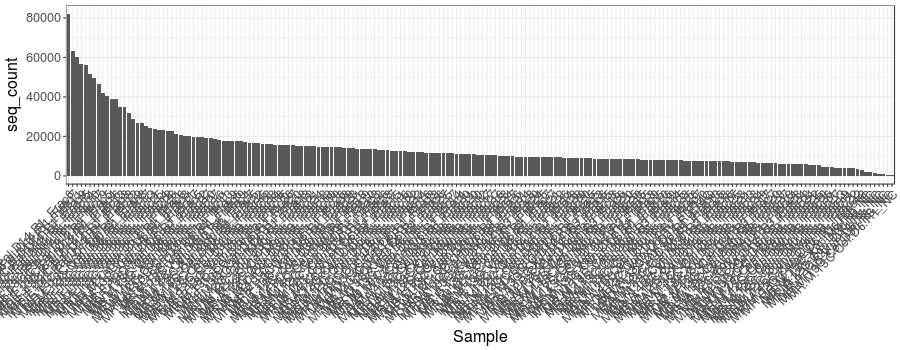

In [21]:
%%R -i df_seq_cnt -w 900 -h 350

df_seq_cnt$Sample = reorder(df_seq_cnt$Sample, desc(df_seq_cnt$seq_count))

ggplot(df_seq_cnt, aes(Sample, seq_count)) +
    geom_bar(stat='identity') +
    theme_bw() +
    theme( 
        text = element_text(size=16),
        axis.text.x = element_text(angle=45, hjust=1)
    )

In [24]:
%%R
df_seq_cnt[df_seq_cnt$seq_count < 5000,]

                        Sample seq_count
73  MR.M.12C-Con.D30.R1_Frac26      4495
94  MR.M.12C-Con.D14.R1_Frac27      4211
134      MR.M.13C-Cel.D6.R1_NC       668
142     MR.M.12C-Con.D14.R1_NC      1230
143 MR.M.12C-Con.D14.R1_Frac19      4059
150     MR.M.13C-Cel.D30.R3_NC       720
157 MR.M.12C-Con.D30.R1_Frac22      3371
165 MR.A.13C-Xyl.D14.R3_Frac22      3811
170 MR.M.12C-Con.D14.R1_Frac11      4010
182 MR.M.12C-Con.D30.R1_Frac23      4197
183  MR.F.13C-Van.D6.R1_Frac18      3080
184     MR.M.12C-Con.D30.R1_NC      1491
186 MR.M.13C-Cel.D30.R3_Frac19      4543
187     MR.A.13C-Xyl.D14.R3_NC      2098
189 MR.M.13C-Cel.D30.R3_Frac11      4452
190      MR.M.13C-Van.D6.R1_NC      2180
191      MR.F.13C-Van.D6.R1_NC       807


### Are the number of samples returned the same as expected?

In [23]:
print ("You got " + str(len(df_seq_cnt)) + " samples")
print ("You should have " + str(len(df_meta)) + " samples")


You got 192 samples
You should have 192 samples
